<a href="https://colab.research.google.com/github/socratesjnr/asuu-strike-project/blob/main/student_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Barplot of the students distribution in the university. Compare to the distribution of form dataset.
                                                 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
                  
student_distribution={'faculty':['Arts', 'Basic Medical Sciences',
                                 'Clincal Sciences', 'Dental Sciences',
                                 'Education', 'Engineering', 
                                 'Environmental Sciences', 'Law', 
                                 'Management Sciences', 'Pharmacy', 
                                 'Science', 'Social Sciences'],
                      'student_dist':[3828, 397, 1819, 181, 7046, 3770, 
                                       1466, 1929, 4468, 713, 5868, 3956]}
student_dist=pd.DataFrame(student_distribution)
student_dist.set_index('faculty',inplace=True)

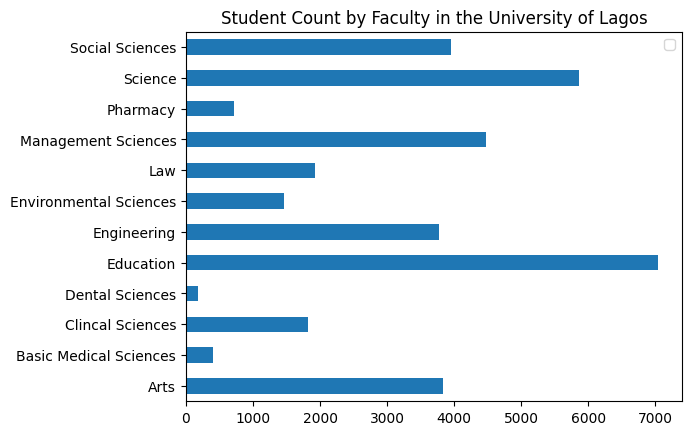

In [29]:
student_dist.plot(kind='barh', xlabel='',
                   title='Student Count by Faculty in the University of Lagos')
plt.legend('')

,student_dist
faculty,
Arts,10.801050
Basic Medical Sciences,1.120172
Clincal Sciences,5.132474
Dental Sciences,0.510708
Education,19.880929
Engineering,10.637397
Environmental Sciences,4.136452
Law,5.442849
Management Sciences,12.606868


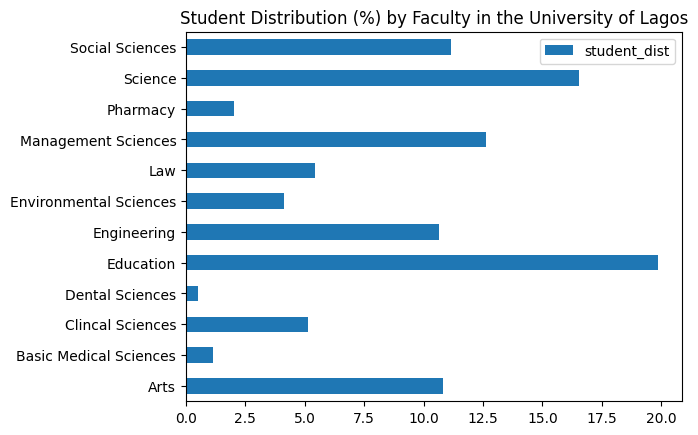

In [30]:
total_student_count = sum(student_dist['student_dist'])
perc_student_count = 100 * student_dist/total_student_count
# perc_student_count = perc_student_count.sort_values(ascending=True)

perc_student_count.plot(kind='barh', xlabel='', title='Student Distribution (%) by Faculty in the University of Lagos')
perc_student_count

## Sample Strata
This gives the minimum number of students we require from each faculty to ensure our data adequately represents the population.

### Minimum strata

In [31]:
from statsmodels.stats.proportion import samplesize_confint_proportion

# Set the desired confidence level and margin of error
conf_level = 0.95
margin_error = 0.05

# Estimate the proportion of affected students (for example, 0.5)
p = 0.5

# Calculate the required sample size
sample_size = samplesize_confint_proportion(p, margin_error, alpha=(1-conf_level))
print(f"The minimum required sample size is {int(sample_size)}")


The minimum required sample size is 384


In [32]:
minimum = sample_size
min_strata = round(perc_student_count*minimum/100)
min_strata

,student_dist
faculty,
Arts,41.0
Basic Medical Sciences,4.0
Clincal Sciences,20.0
Dental Sciences,2.0
Education,76.0
Engineering,41.0
Environmental Sciences,16.0
Law,21.0
Management Sciences,48.0


### Target strata

In [33]:
target = 1200
target_strata = round(perc_student_count*target/100)
target_strata

,student_dist
faculty,
Arts,130.0
Basic Medical Sciences,13.0
Clincal Sciences,62.0
Dental Sciences,6.0
Education,239.0
Engineering,128.0
Environmental Sciences,50.0
Law,65.0
Management Sciences,151.0


### Applying Cochrane's finite formula to each strata

$s = \frac{n \times p \times (1 - p)}{(n - 1) \times (\frac{e}{z})^2 + p \times (1 - p)}$


Where:

$e$ = error margin,

$z$ = z score,

$s$ = sample size,

$p$ = proportion of the sample affected,

$n$ = population size

In [34]:
from scipy.stats import norm

def calculate_faculty_sample_size(n, conf_level, margin_error, p):
    """
    Calculates the required sample size for a single faculty based on the number of
    students in the faculty, the desired confidence level, margin of error, and the estimated proportion
    of affected students.
    
    Args:
    - row (pandas.Series): a Pandas Series representing a single row of the DataFrame
    - conf_level (float): the desired confidence level
    - margin_error (float): the desired margin of error
    - p (float): the estimated proportion of affected students
    
    Returns:
    - sample_size (float): the required sample size for the faculty
    """
    
    # Calculate the critical value for the desired confidence level
    z_score = norm.ppf(1 - (1 - conf_level) / 2)
    
    # Calculate the required sample size with population correction factor
    sample_size = n * p * (1 - p) / ((n - 1) * (margin_error / z_score)**2 + p * (1 - p))
    
    return round(sample_size)


In [35]:
margin_of_error = 0.05
confidence_level = 0.95

In [36]:
calculate_faculty_sample_size(total_student_count, confidence_level, margin_of_error, p=0.5)

380

In [37]:
# student_dist['minimum_reqd'] = student_dist["student_dist"].apply(calculate_faculty_sample_size, args=(0.95, 0.05, 0.5))
# # student_dist.student_dist.sum()
# student_dist